In [1]:
from IPython.core.display import HTML
import pandas as pd 

pd.set_option('display.float_format', lambda x: '%.3f' % x)

def set_css_style(css_file_path):
    """
    Read the custom CSS file and load it into Jupyter.
    Pass the file path to the CSS file.
    """
    styles = open(css_file_path, "r").read()
    return HTML(styles)

set_css_style('styles/custom.css')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# we need the following line to be able to visualize data within the juptyer
%matplotlib inline 

# We will also need to import numpy, a numerical library that we will need
# to comput the log on a series. By convention, numpy's alias is `np`
import numpy as np




# rather than manually set the plot size each time we need to plot, globally.
# All the plots will have the size specified below
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
spending_df = pd.read_table( 'data/spending_10k.tsv', 
                                index_col="unique_id", 
                                dtype={"doctor_id":"object"}
                           )

# Visualizing Data with Seaborn

- `pandas` DataFrame have various methods to plot 
  - See the documentation and example here:
    https://pandas.pydata.org/pandas-docs/stable/visualization.html
    
- For instance, plotting the histogram of drug spending in a `DataFrame` can be done using:

```python
spending_df.plot( x='spending', kind = 'hist') 
```




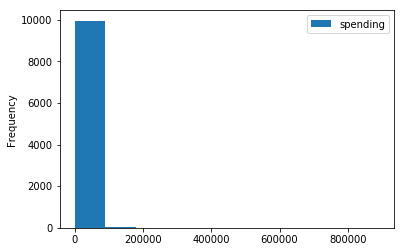

In [5]:
spending_df.plot( y='spending', kind = 'hist')

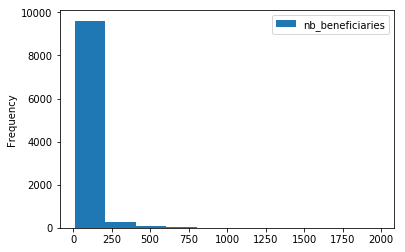

In [6]:
spending_df.plot( y='nb_beneficiaries', kind = 'hist')

### `DataFrame.plot` documentation

- The complete doc for `DataFrame.plot` can be found at the following URL:
    https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    
- The method has a large number of parameters that can be tweaked to produce a publication ready plot
- Additionally, since the method uses `matplotlib` undearneath, it also supports all valid matplotlib `parameters`. 
  For example, `edgecolor` can be used to give edge to histogram bars although it's not visible in the documentation 

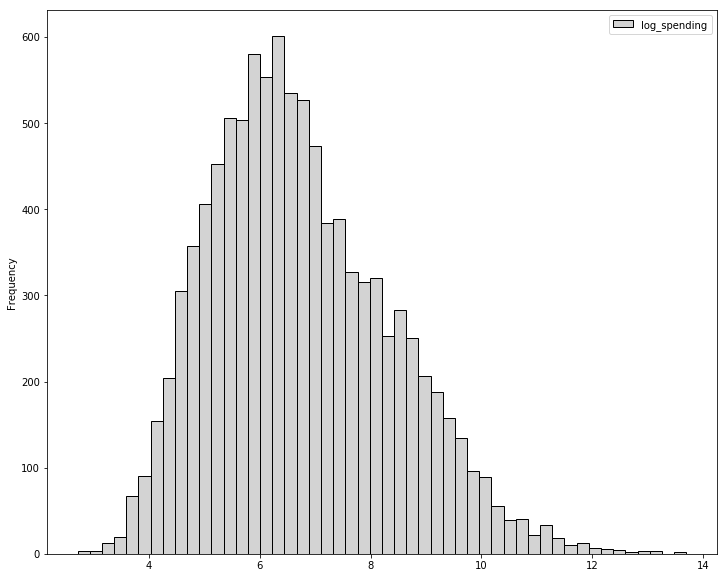

In [7]:

spending_df["log_spending"] = np.log(spending_df["spending"])

spending_df.plot(y="log_spending", kind = 'hist', bins = 50, 
                  figsize=(12,10), color='lightgrey', edgecolor="black" ) 





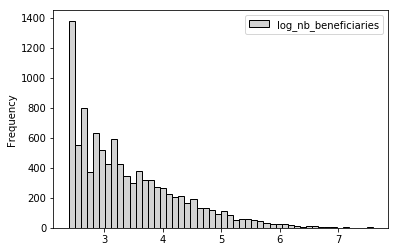

In [8]:


spending_df["log_nb_beneficiaries"] =  np.log(spending_df["nb_beneficiaries"])

spending_df.plot(y="log_nb_beneficiaries", kind = 'hist', bins = 50, 
                   color='lightgrey', edgecolor="black" ) 


### Alternative visualization plots in Python
- However, visualization is not a primary focus of pandas 
  - Although its a good way to produce quick plots, it 's not comprehensive
  
- There are plenty of visualition frameworks in Python

  - Many of the modern one are built on top of Pandas -- they understand Pandas structure and make it easy to work with DataFrame and Series

  https://pandas.pydata.org/pandas-docs/stable/ecosystem.html#ecosystem-visualization


- For example: yhat/ggplot (ggplot2) which is similar to the R's `ggplot2`

### Seaborn 
- Seaborn is a popular Python visualization framework that is built on matplotlib 
- Simplifies creating  many common visalizations
- Uses colors and font sizes that improbve readability and aesthetics
- As is the case with installed Python libraries needs to be imported before it can be used.
- It's common to import Seaborn with the `sns` shortcut.

```python
import seaborn as sns
```


#### `seaborn` Examples
![](images/pandas.png)

### Class of Plots  in `seaborn`
#### `seaborn` supports three plotting categories. Those are:

1- Visualizing the distribution of a dataset. This can be done as histograms and KDE plots, contour plot for bivariate data, etc.

2- Plotting with categorical data. These functions can be used to generate barplots, box plots for each category and violin plots.

3- Plotting linear relationships. This class of plots is used to plot regressions between pairs of variables.

4- Data-aware grid plots. This class is responsible for providing the logic necessary to combine the previous plots into grids (subplot in `matplab`).
  

### Using `seaborn` with `whitegrid` Theme
- By Default, `seaborn` offers preset themes that select a set of matching colors and styles.
- Those are: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`
  - We will use `whitegrid` to explore `seaborn`
![](images/dark_white_grid.png)

In [380]:
spending_df.head()


,doctor_id,specialty,medication,nb_beneficiaries,spending,log_spending,log_nb_beneficiaries
unique_id,,,,,,,
NX531425,1255626040,FAMILY PRACTICE,METFORMIN HCL,30,135.240,4.907,3.401
QG879256,1699761833,FAMILY PRACTICE,ALLOPURINOL,30,715.760,6.573,3.401
FW363228,1538148804,INTERNAL MEDICINE,LOSARTAN POTASSIUM,146,1056.470,6.963,4.984
WD733417,1730200619,PSYCHIATRY,OLANZAPINE,13,28226.970,10.248,2.565
XW149832,1023116894,FAMILY PRACTICE,PRAVASTATIN SODIUM,348,8199.480,9.012,5.852


### Visualizing the distribution using `distplot`

- `seaborn's` `distplot` is convenient way to explore univariate distribution.
- By default it takes a numeric `Series` and plots KDE, a histgram, and a rug plot

```python
sns.distplot(spending_df["log_spending"])
```

- When working with a large dataset, it's often  recommended to explore plots on a small subset of the data
  - You can sample a small subset (ex. 500 entries) using the `sample()` method, as shown below
  
spending_df["log_spending"].sample(500)  



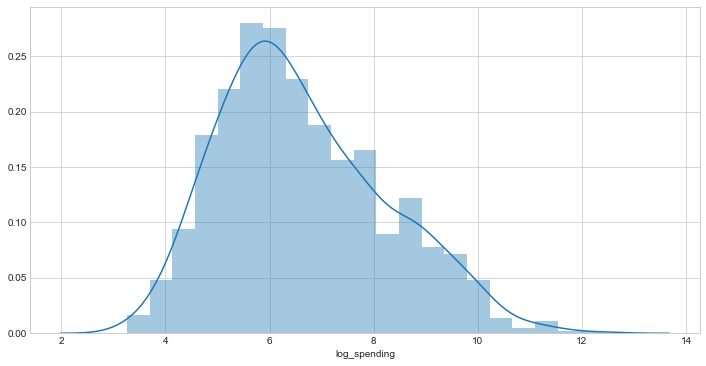

In [11]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(spending_df["log_spending"].sample(1000))

### Customizing `distplot`
- The behavior of distplot can be customized by setting the various function parameters. 
- For instance, below,  we remove the density function (kde) and add a rug plot
- We can also pass parameters to matplotlib, however, we need to explicitely say that we need to pass them as histogram Key Word  (`param` hist_kws), pass the values as a dictionary.
  - Simiarly, to change parameter of the KDE, we need to pass them to kde_kws={}
- We can add a label and plot the legend the same way as with `matplotlib`
  


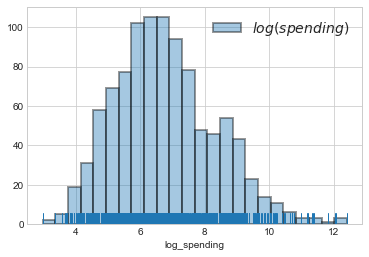

In [12]:
plt.figure
sns.distplot(spending_df["log_spending"].sample(1000), kde=False, rug=True,
             hist_kws={"edgecolor":"black", "linewidth":2}, label="$log(spending)$")

plt.legend(fontsize=14)

In [383]:
# list of coloramps https://matplotlib.org/users/colormaps.html
# usefule color maps http://colorbrewer2.org/#type=sequential&scheme=PuBu&n=3


## Plotting bivariate distributions

- `seaborn` has a function called `jointplot` which creates figures with 3 different subplot (3 panels) 
 - The main figure shows the joint distribution of both variables
 - the two others show the univariate (or marginal) distribution the the two distribitions
- can take either two `Series` (the data from both distributions) or a DataFrame with labels representing the names of the columns to plot
```python
sns.jointplot(x="x", y="y", data=spendign_df);
# or
sns.jointplot(x=spendign_df["log_spending"], y=spendign_df["nb_beneficiaries"], data=spendign_df);
```

- We will plot the joint distribution of spenging and nb_beneficiaries.
  - By Defaut, `jointplot`'s joint distribution is a scatter plot, which is not ideal for working with large dataset.
  - We therfore sample only 100 point to illustrate this.


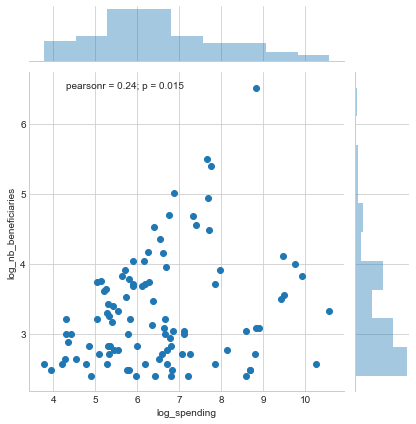

In [13]:
sample_data = spending_df.sample(100)


sns.jointplot(x="log_spending", y="log_nb_beneficiaries", data=sample_data);




### Modifying the Behavior `jointplot`
- The analogue of a histogram is known as a “hexbin” plot
  - Those are also bins (although hexagonal instead of rectangular)
  - It’s available through the matplotlib plt.hexbin function and as a style in jointplot().
- `hexbin` are ideal for working with large datasets, as we don't need to trim'

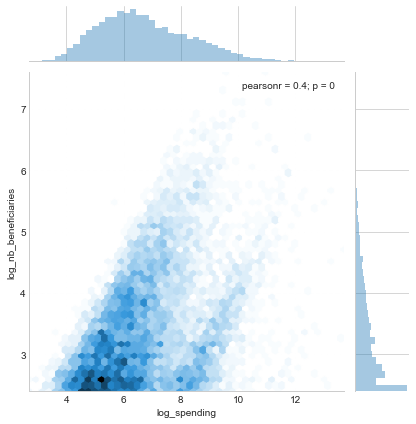

In [14]:

sns.jointplot(x="log_spending", y="log_nb_beneficiaries", data=spending_df, kind="hexbin");

# look like a half, skewed multivariate normal



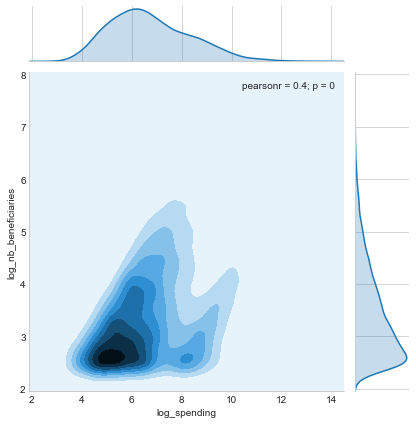

In [15]:

sns.jointplot(x="log_spending", y="log_nb_beneficiaries", data=spending_df, kind="kde");

# look like a half, skewed multivariate normal



### Plotting with categorical data
The classes for plots in `seaborn` for vizualizing categorical data are further divided into three categories:

1- Those that show each observation at each level of the categorical variable,

2- Those that show an abstract representation of each distribution of observations

3- Those that apply a statistical estimation to show a measure of central tendency and confidence interval. 

- all these classes plot the data exactly the same way
- They take a hue (binary variable) to split the data on 


![](images/cat_plots.png)

In [16]:
all_data = pd.read_table("./data/spending_with_drug_class_indic_10k.tsv")
all_data["log_nb_beneficiaries"] =  np.log(all_data["nb_beneficiaries"])
all_data["log_spending"] =  np.log(all_data["spending"])


spending_partial_df = all_data[all_data["specialty"].isin(["INTERNAL MEDICINE", "EMERGENCY MEDICINE", "PSYCHIATRY"])]




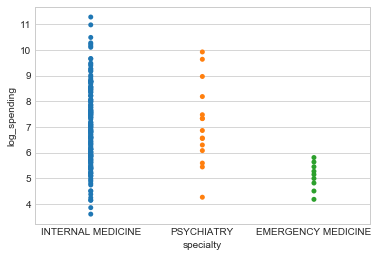

In [17]:
sns.stripplot(x="specialty", y="log_spending", data=spending_partial_df.sample(200))

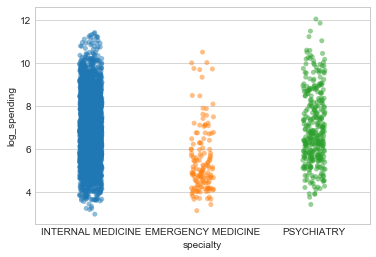

In [18]:
sns.stripplot(x="specialty", y="log_spending", data=spending_partial_df, jitter=True, alpha=0.5)

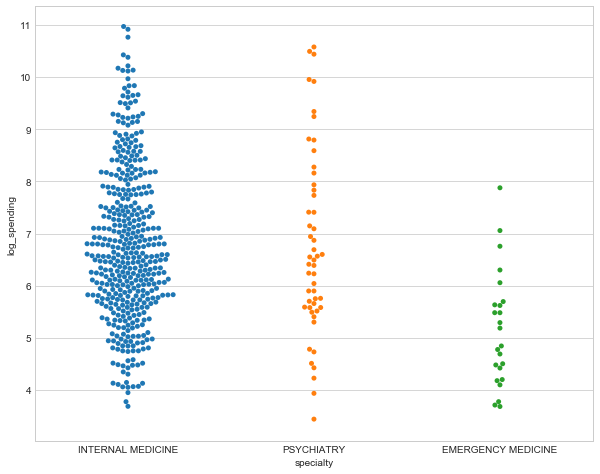

In [390]:
sns.swarmplot(x="specialty", y="log_spending", data=spending_partial_df.sample(500))


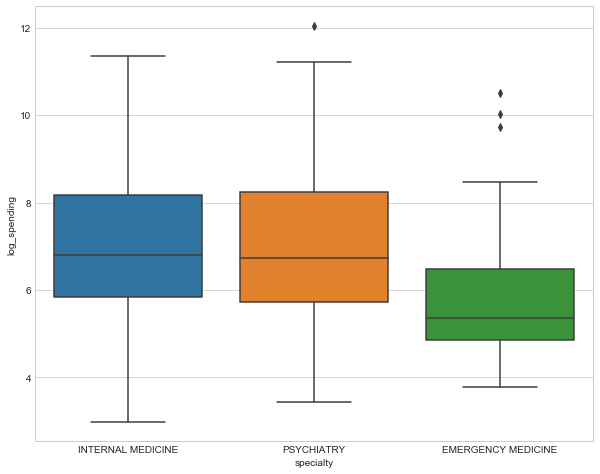

In [391]:
sns.boxplot(x="specialty", y="log_spending", data=spending_partial_df.sample(1000))


### Plotting Distribution 
- To change between categories, you only need to change the plot name (refer to the figure above)
- For instance, to change the swarmplot to boxplot or violinplot we can write:

```python
sns.boxplot( x="specialty", 
             y="log_spending", 
             data=spending_partial_df.sample(1000))

sns.violinplot( x="specialty",
                y="log_spending", 
                data=spending_partial_df.sample(1000))
```

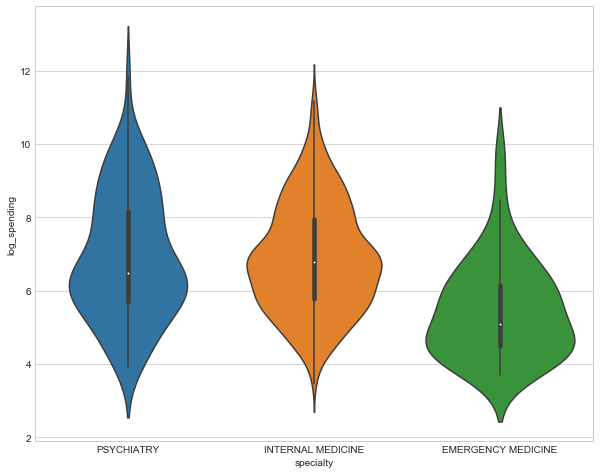

In [392]:
sns.violinplot(x="specialty", y="log_spending", data=spending_partial_df.sample(1000))


### Plotting Estiamates

- For a summary-type plot, we can use a pointplot or a barplot

```python
sns.pointplot( x="specialty", 
             y="log_spending", 
             data=spending_partial_df.sample(1000))

sns.barplot( x="specialty",
                y="log_spending", 
                data=spending_partial_df.sample(1000))
```


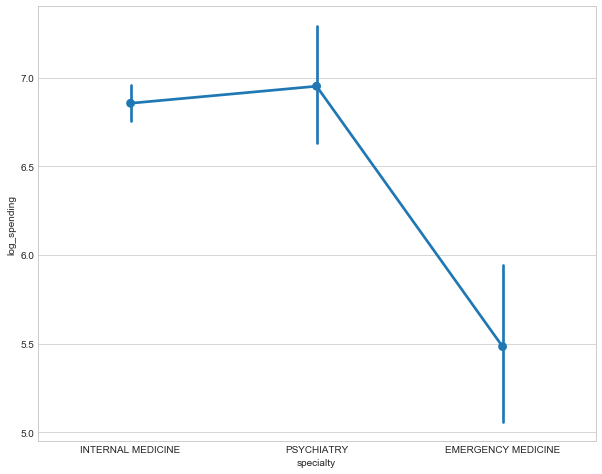

In [393]:
sns.pointplot( x="specialty", 
             y="log_spending", 
             data=spending_partial_df.sample(1000))


# Adding Hue To the Data

- All three categories of plots can add a nested categorical variable with the hue parameter
- The data is automatically plotted by hue and the legend will automatically populate with the correct information


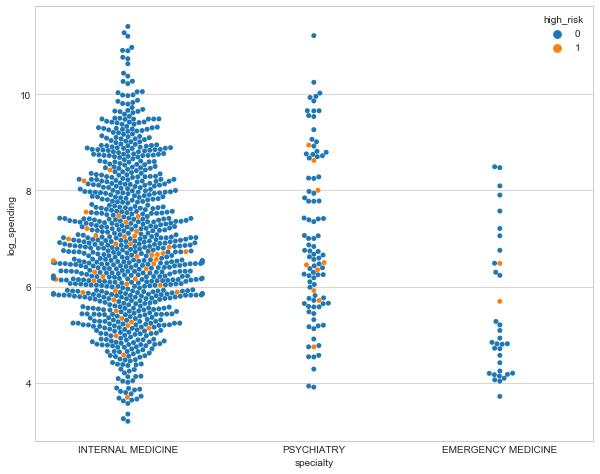

In [394]:
sns.swarmplot(x="specialty", y="log_spending", hue="high_risk", data=spending_partial_df.sample(1000))


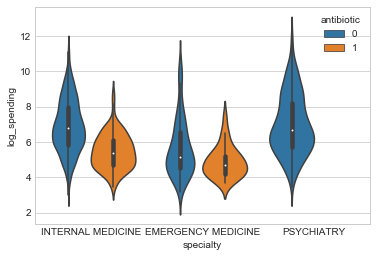

In [37]:
sns.violinplot(x="specialty", y="log_spending", hue="antibiotic", data=spending_partial_df)


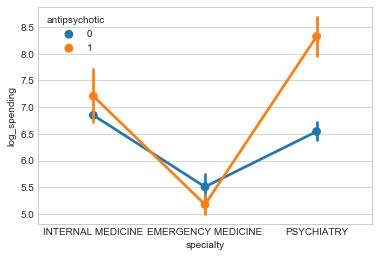

In [20]:
sns.pointplot(x="specialty", y="log_spending", hue="antipsychotic", data=spending_partial_df)

### Visualizing linear relationships

- `seaborn` offers regression plots as means to highlight patterns or lackthereof in a dataset during exploratory data analyses. 
  - However, note that `seaborn` is not itself a package for statistical analysis 
  
  
- `seaborn` has two plots for handling linear relationships, `regplot()` and `lmplot()`
- The default call for these two involves passing them two `Series`, one representing the x-axis and the second the y-axis


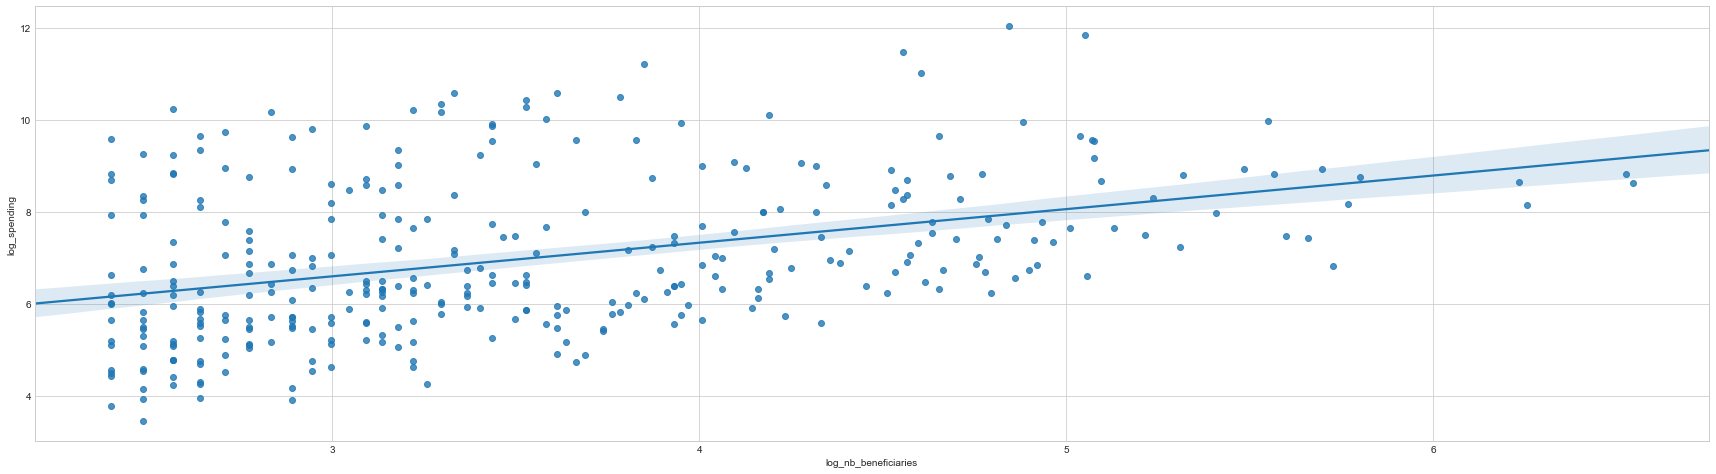

In [397]:
plt.figure(figsize=(30,8))
spending_psych = all_data[all_data["specialty"] == "PSYCHIATRY"]
sns.regplot(x="log_nb_beneficiaries", y="log_spending", data=spending_psych);

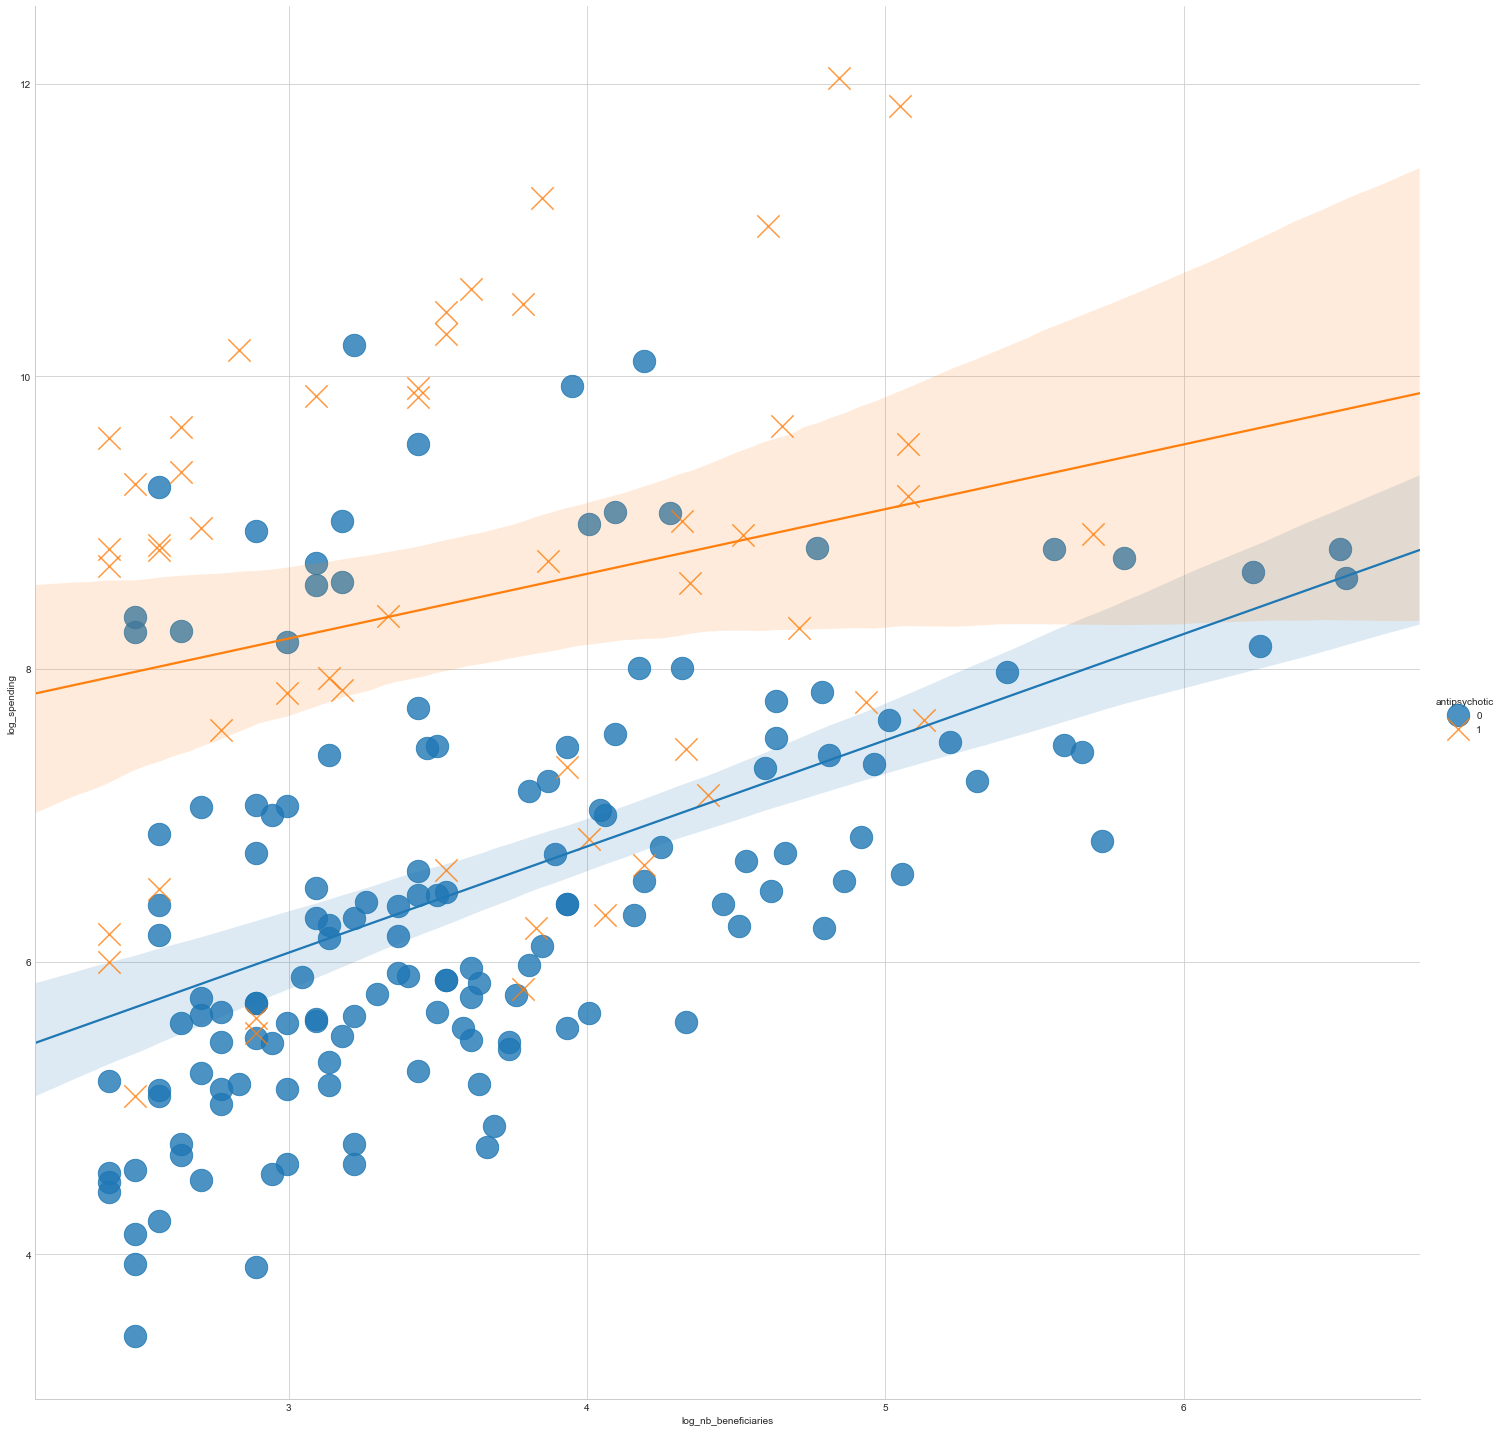

In [447]:
sns.lmplot(x="log_nb_beneficiaries", y="log_spending", hue= "antipsychotic", size=20, markers=["o", "x"],
           scatter_kws={"s": 500}, data=spending_psych.sample(200));


In [22]:
spending_partial_df["indication_flag"].value_counts()

not_ctr_indic    3033
antibiotic        177
high_risk         161
opioid            132
antipsychotic     124
Name: indication_flag, dtype: int64

Text(0.5,0.98,'Total spending on antibiotics or antipsychotics')

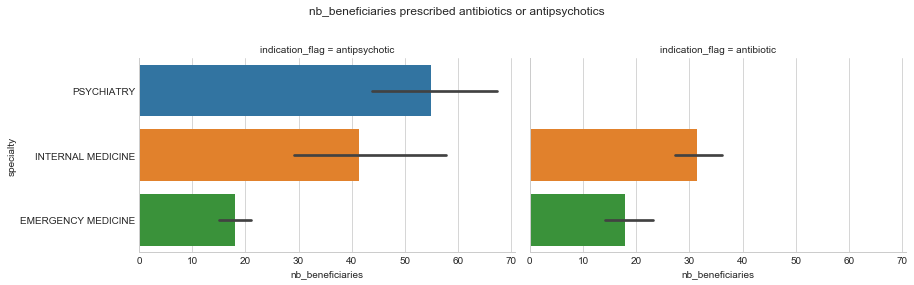

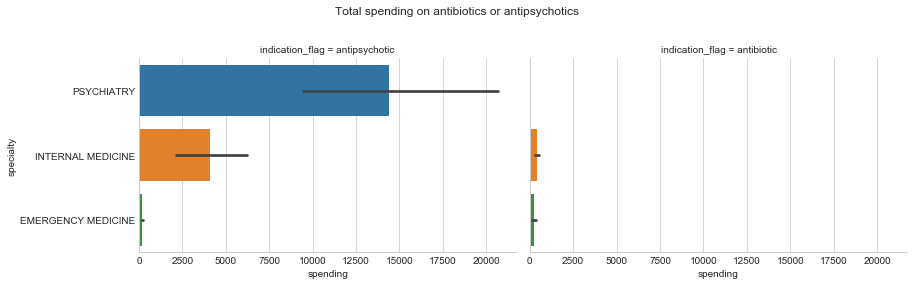

In [30]:
subset_df = spending_partial_df[(spending_partial_df["indication_flag"] =='antibiotic') |  (spending_partial_df["indication_flag"] == 'antipsychotic')]


spending_plot = sns.factorplot(x='nb_beneficiaries', y="specialty", kind='bar', col='indication_flag', size=4, aspect=1.6,
               orient='h', 
               data=subset_df, )
plt.subplots_adjust(top=0.8)
plt.suptitle("nb_beneficiaries prescribed antibiotics or antipsychotics")

total_plot = sns.factorplot(x='spending', y="specialty", kind='bar', col='indication_flag', size=4, aspect=1.6,
               orient='h', 
               data=subset_df)
plt.subplots_adjust(top=0.8)
plt.suptitle("Total spending on antibiotics or antipsychotics")

In [24]:
spending_partial_df["indication_flag"].value_counts()

not_ctr_indic    3033
antibiotic        177
high_risk         161
opioid            132
antipsychotic     124
Name: indication_flag, dtype: int64

### Exporting plots

- Saving plots to PNG or image format
- Seaborn has a `savefig` method

```python
>>> plot_object.savefig('myplot-image.png')
```

In [31]:
spending_plot.savefig("spending.png")
total_plot.savefig("total.png")

### Summary:
- What we covered here is merely the basics of the most important aspects of plots in `seaborn`

- `seaborn` has a lot of additional functionality and the best place to start exploring it are the `seaborn` tutorial (https://seaborn.pydata.org/tutorial)



### Practical

- Start with a new Jupyter Notebook.


- Read the file `data/medication_to_class_indiction.tsv` located in the data folder into a new `pandas` `DataFrame` called `spending_practical_df`.

  - Make sure you import the appropriate module first to enable DataFrames and plots.
  - Also, make sure that your Jupyter notebook is configured to display plots
  
- From the above, it seems that the values for `spending` and `nb_beneficiares` are very skewed. After computing the log for this values, you now want to see whether the distributions of the `log_nb_beneficiares` and `log_spending` look normal. Use the appropriate plot to visualize the values for these two variables side by side. Your plot should look like the plot below:

   - Your plot should be 15 inches wide by 4 inches high. It should be similar to the plot below.

![](http://128.171.10.138:4005/assets/images/plt_2.png)  
  

- What are the top five `specialties` in terms of their `nb_beneficiaries`
  - Create a new `DataFrame` that contains only entries from the top five `specialties`. Call it `top_5_specialties`
  - Use boxplots to visually compare distributions for the `log_nb_beneficiaries` column in `top_5_specialties`. 
   - Your plot should be 15 inches wide by 4 inches high. It should be similar to the plot below.


![](http://128.171.10.138:4005/assets/images/plt_1.png)  



- Generate a regression plot where the `log_nb_benificiaries` is on the $x-$axis and the log_spending is on the $y-$axis for all entries of   spending_practical_df where  `specialty` is equal to "GERIATRIC MEDICINE."

    - Your plot should be 15 inches wide by 4 inches high. It should be similar to the plot below.
   
![](http://128.171.10.138:4005/assets/images/plt_3.png)  
    
    - The light-blue band around your regression line is the confidence interval for the regression line. What is the confidence interval set to by default? Can you change it to a 55% confidence interval?


- You are interested in the top 10 medicines that generated the most spending.
  - Compute the total `spending` per medicine` and sort it by the most costly regarding spending to the least costly
  - Use a barplot to plot the 10 medicines that account for most of the spending.
  - Change the color of the barplot to "#9e66ab".
  - You will notice that the $x-$axis labels overlap each other. Use the command below at the end of the cell:
  ```python
  plt.xticks(rotation=45, ha="right")
  ```
  - What does the command above do?
  - Also, it is considered good aesthetic form to remove the top and the right frame lines around the plot. Find how to do this in Seaborn's aesthetics documentation page.

https://seaborn.pydata.org/tutorial/aesthetics.html

  - Your plot should be 15 inches wide by 4 inches high. It should be similar to the plot below.

![](http://128.171.10.138:4005/assets/images/plt_4.png)  

